## Population Dynamics of Drug-Induced Hybrid State during Adaptive Therapy in Cancer
### Ghanendra Singh, Independent Curiosity Driven Research Association (ICRDA), Bangaore

In [1]:
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

# set default font sizes for plots
plt.rc('font', size=20)          # controls default text sizes
plt.rc('axes', titlesize=20)     # fontsize of the axes title
plt.rc('axes', labelsize=20)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
plt.rc('ytick', labelsize=20)
plt.rc('text', usetex=False)

## AT for SR Model

In [2]:
def AT_SR(t,PSA,rs,rS_val,ds,dS_val,S,AT_Flag,psa):

    if PSA >= 20000 and AT_Flag:
        rs = rS_val
        ds = dS_val
        AT_Flag = False
        psa = PSA
        
    elif PSA <= psa/2 and AT_Flag==False:
        AT_Flag = True
        rs = 0.2
        ds = 0.1
        psa = PSA
    
    return rs,ds,AT_Flag,psa

## SR Model

F:0.010 ,a:1.00, b:1.00, Psr:0.000, Prs:0.02


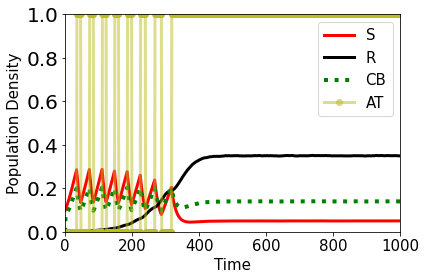

In [3]:
def SR_Model(ALPHA,BETA,KSR,KRS,rS_val,dS_val,DT,FR,INI_P):

    #Parameters
    rs = 0.2
    rr = 0.2
    ds = 0.1
    dr = 0.1
    K = 100000 # (10^5)

    kSR = KSR
    kRS = KRS
    alpha = ALPHA
    beta = BETA
    
    sigma = 0.001
    sigma1 = 0.01
    sigma2 = 0.01

    #Initial values
    ini = INI_P
    fr = FR

    Cs0 = (1-fr)*ini
    Cr0 = fr*ini

    n = 10**3
    Cs = np.zeros(n)
    Cr = np.zeros(n)

    PSA = np.zeros(n)

    AT_val = np.zeros(n)
    
    aS = 0.7
    bR = 0.3
    
    Cs[0] = Cs0
    Cr[0] = Cr0

    #dt = 2
    #dt = 5
    dt = DT
    T = 1000 # days
    t = np.linspace(0.0,T,n)
    sqrtdt = np.sqrt(dt)
    
    rS = 0.2
    dS = 0.1
    
    F = True
    psa = 0
    
    for i in range(n-1):
        rs,ds,f,p = AT_SR(i,PSA[i],rs,rs_val,ds,ds_val,Cs[i],F,psa)
        F=f
        psa = p
        Cs[i+1] = Cs[i] + rs*Cs[i]*(1-(Cs[i]+beta*Cr[i])/K)*dt - kSR*Cs[i]*dt + kRS*Cr[i]*dt - ds*Cs[i]*dt + sigma*Cs[i]*sqrtdt*np.random.randn()
        Cr[i+1] = Cr[i] + rr*Cr[i]*(1-(alpha*Cs[i]+Cr[i])/K)*dt + kSR*Cs[i]*dt - kRS*Cr[i]*dt - dr*Cr[i]*dt + sigma*Cr[i]*sqrtdt*np.random.randn()
        
        PSA[i+1] = aS*Cs[i+1] + bR*Cr[i+1]

        if rs==rs_val and ds==ds_val:
            AT_val[i+1] = 1.0
    
    print("F:%0.3f ,a:%0.2f, b:%0.2f, Psr:%0.3f, Prs:%0.2f"%(fr,alpha,beta,kSR,kRS))
    
    mean_Cs = np.mean(Cs,axis=0)
    std_Cs = np.std(Cs,axis=0)
    mean_Cr = np.mean(Cr,axis=0)
    std_Cr = np.std(Cr,axis=0)

    #plt.figure(figsize=(12,8))
    plt.plot(t,Cs/K,'-r',lw=3,label='S')
    plt.plot(t,Cr/K,'-k',lw=3,label='R')
    plt.plot(t,PSA/K,'g:',lw=4,label='CB')
    plt.plot(t,AT_val,'-oC8',lw=3,label='AT',alpha=0.5)
    #plt.plot(Cr,Cs,lw=3,label='S vs R')
    #plt.scatter(t,AT_ton,lw=1,label='AT')

#    plt.fill_between(range(len(Cs)),(Cs-std_Cs)/K,(Cs+std_Cs)/K,color='r',alpha= 0.2)
#    plt.fill_between(range(len(Cs)),Cr-std_Cr,Cr+std_Cr,color='k',alpha= 0.2)

    plt.legend(fontsize=15)
    plt.ylabel('Population Density',fontsize=15)
    plt.xlabel('Time',fontsize=15)
    #plt.title("F:%0.3f ,a:%0.2f, b:%0.2f, Psr:%0.3f, Prs:%0.2f"%(fr,alpha,beta,kSR,kRS))
    plt.xticks(fontsize=15)
    #plt.yticks(fontsize=15)
    plt.ylim([0,1])
    plt.xlim([0,1000])
    #plt.savefig("F:%0.3f ,a:%0.2f, b:%0.2f.png"%(fr,alpha,beta))
    #plt.savefig("Figures/AT_SR/F:%0.2f, a:%0.2f, b:%0.2f Psr:%0.2f, Prs:%0.2f.png"%(fr,alpha,beta,kSR,kRS))
    plt.show()

a = 1.0
b = 1.0
Psr = 0.00
Prs = 0.02

rs_val = 0.1
ds_val = 0.2

INI_P = 10000
FR = 0.01

DT = 0.5

SR_Model(a,b,Psr,Prs,rs_val,ds_val,DT,FR,INI_P)

## AT for SHR Model

In [4]:
def AT_SHR(t,PSA,psa_threshold,rs,rS_val,ds,dS_val,S,AT_Flag,psa):
#    for ts,te in AT_t:

    if PSA >= psa_threshold and AT_Flag:
        rs = rS_val
        ds = dS_val
        AT_Flag = False
        psa = PSA
        
    elif PSA <= psa/2 and AT_Flag==False:
        AT_Flag = True
        rs = 0.2
        ds = 0.1
        psa = PSA
    
    return rs,ds,AT_Flag,psa

## SHR Model

F:0.010 , $P_{S}$:0.00, b:0.00, c:0.00, Psr:0.000, Prs:0.00, Prf:0.00


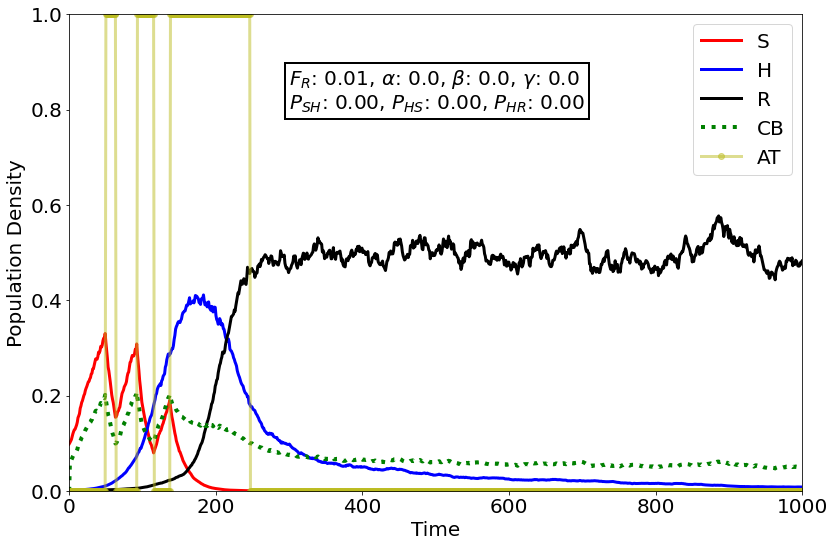

In [5]:
def SHR_Model(ALPHA,BETA,GAMMA,KSR,KRS,KRF,rS_val,dS_val,DT,PSA_T,FR,INI_P):

    #Parameters
    rs = 0.2
    rr = 0.2
    ds = 0.1
    dr = 0.1
    
    rf = 0.2
    df = 0.1
    
    K = 100000 # (10^5)

    kSR = KSR
    kRS = KRS
    kRF = KRF
    alpha = ALPHA
    beta = BETA
    gamma = GAMMA
    
    sigma =  0.02
    sigma1 = 0.01
    sigma2 = 0.01

    #Initial values
    ini = INI_P
    fr = FR

    Cr0 = fr*ini
    Cf0 = fr/2*ini
    Cs0 = (1-fr-fr/2)*ini

    n = 10**3
    Cs = np.zeros(n)
    Cr = np.zeros(n)
    Cf = np.zeros(n)

    PSA = np.zeros(n)
    psa_threshold = PSA_T
    
    AT_val = np.zeros(n)
    
    aS = 0.6
    bR = 0.3
    cF = 0.1
    
    Cs[0] = Cs0
    Cr[0] = Cr0
    Cf[0] = Cf0

    #dt = 2
    #dt = 5
    dt = DT
    T = 1000 # days
    t = np.linspace(0.0,T,n)
    sqrtdt = np.sqrt(dt)
    
    rS = 0.2
    dS = 0.1
    
    F = True
    psa = 0
    
    for i in range(n-1):
        rs,ds,f,p = AT_SHR(i,PSA[i],psa_threshold,rs,rs_val,ds,ds_val,Cs[i],F,psa)
        F=f
        psa = p
        Cs[i+1] = Cs[i] + rs*Cs[i]*(1-(Cs[i]+beta*Cr[i]+Cf[i])/K)*dt  - kSR*Cs[i]*dt + kRS*Cr[i]*dt - ds*Cs[i]*dt + sigma*Cs[i]*sqrtdt*np.random.randn()
        Cr[i+1] = Cr[i] + rr*Cr[i]*(1-(alpha*Cs[i]+Cr[i]+Cf[i])/K)*dt + kSR*Cs[i]*dt - kRS*Cr[i]*dt - dr*Cr[i]*dt + sigma*Cr[i]*sqrtdt*np.random.randn() - kRF*Cr[i]*dt
        Cf[i+1] = Cf[i] + rf*Cf[i]*(1-(Cs[i]+gamma*Cr[i]+Cf[i])/K)*dt + kRF*Cr[i]*dt - df*Cf[i]*dt + sigma*Cf[i]*sqrtdt*np.random.randn()

        PSA[i+1] = aS*Cs[i+1] + bR*Cr[i+1] + cF*Cf[i+1]
        
        if rs==rs_val and ds==ds_val:
            AT_val[i+1] = 1.0
    
    #fig,ax = plt.subplots(1,1, figsize = (10,8))

    mean_Cs = np.mean(Cs,axis=0)
    std_Cs = np.std(Cs,axis=0)
    mean_Cr = np.mean(Cr,axis=0)
    std_Cr = np.std(Cr,axis=0)
    
    mean_Cf = np.mean(Cf,axis=0)
    std_Cf = np.std(Cf,axis=0)

    print("F:%0.3f , $P_{S}$:%0.2f, b:%0.2f, c:%0.2f, Psr:%0.3f, Prs:%0.2f, Prf:%0.2f"%(fr,alpha,beta,gamma,kSR,kRS,kRF))
    
    #plt.figure(figsize=(10,6))
#     plt.plot(t,Cs,'--r',lw=3,label='S')
#     plt.plot(t,Cr,'-.k',lw=3,label='H')
#     plt.plot(t,Cf,'--b',lw=3,label='R')
#     plt.plot(t,PSA,':g',lw=3,label='CB')
    
#    plt.fill_between(range(len(Cs)),Cs-std_Cs,Cs+std_Cs,color='r',alpha= 0.2)
#    plt.fill_between(range(len(Cr)),Cr-std_Cr,Cr+std_Cr,color='k',alpha= 0.2)
#    plt.fill_between(range(len(Cf)),Cf-std_Cf,Cf+std_Cf,color='b',alpha= 0.2)

    
    # To plot polulation Density
    plt.figure(figsize=(12,8))
    plt.plot(t,Cs/K,'-r',lw=3,label='S')
    plt.plot(t,Cr/K,'-b',lw=3,label='H')
    plt.plot(t,Cf/K,'-k',lw=3,label='R')
    plt.plot(t,PSA/K,'g:',lw=4,label='CB')
    
    plt.plot(t,AT_val,'-oC8',lw=3,label='AT',alpha = 0.5)

    #plt.fill_between(range(len(Cs)),(Cs-std_Cs)/K,(Cs+std_Cs)/K,color='r',alpha= 0.1)
    #plt.fill_between(range(len(Cr)),(Cr-std_Cr)/K,(Cr+std_Cr)/K,color='k',alpha= 0.1)
    #plt.fill_between(range(len(Cf)),(Cf-std_Cf)/K,(Cf+std_Cf)/K,color='b',alpha= 0.1)

    
    #plt.plot(Cr,Cs,lw=3,label='S vs R')
    #plt.scatter(t,AT_ton,lw=1,label='AT')
    text = r"$F_{R}$: %0.2f, $\alpha$: %0.1f, $\beta$: %0.1f, $\gamma$: %0.1f"'\n'"$P_{SH}$: %0.2f, $P_{HS}$: %0.2f, $P_{HR}$: %0.2f"%(fr,alpha,beta,gamma,kSR,kRS,kRF)
    plt.text(300, 0.8, text, bbox=dict(fill=False, edgecolor='black', linewidth=2))

    plt.legend(loc="upper right")
    #plt.title(r'$\alpha > \beta$')
    plt.ylabel('Population Density')
    plt.xlabel('Time')
    #plt.title("F:%0.3f ,a:%0.2f, b:%0.2f, c:%0.2f, Psr:%0.3f, Prs:%0.2f, Prf:%0.2f"%(fr,alpha,beta,gamma,kSR,kRS,kRF))
    plt.xticks()
    plt.yticks()
    #plt.ylim([0,100000])
    plt.ylim([0,1.0])
    plt.xlim([0,1000])
    plt.tight_layout()
    #plt.savefig("AT_SHR/SHR/shr_a_0_b_0_g_1_Psh_0.00_Phs_0.01_Phr_0.01.png")
    #plt.savefig("AT_SHR/F:%0.3f ,a:%0.2f, b:%0.2f, c:%0.2f, Psr:%0.3f, Prs:%0.2f, Prf:%0.2f_.png"%(fr,alpha,beta,gamma,kSR,kRS,kRF))
    plt.show()
    

# Competition parameters
a = 0.0  # S --\ H
b = 0.0  # H --\ S
g = 0.0  # H --\ R

#Phenotypic Plasticity
Psr = 0.00 # Switch from S to PR
Prs = 0.00  # Switch from PR to S
Prf = 0.00 # Switch from PR to FR

rs_val = 0.1
ds_val = 0.2

DT = 0.5

# CB - Cancer BioMarker
psa_T = 20000 # CB Threshold
INI_P = 10000 # Initial Population
FR = 0.01 # Initial Fraction of R

SHR_Model(a,b,g,Psr,Prs,Prf,rs_val,ds_val,DT,psa_T,FR,INI_P)